### End to End Stock Market Analysis With Pandas Dataframes In Python
### Important DataFrame Functions

In [197]:
import pandas as pd
import numpy as np

# Function to create a synthetic dataset for a given asset type
def create_asset_data(tickers, start_date, end_date):
    dates = pd.date_range(start=start_date, end=end_date, freq='B')
    data = []
    for ticker in tickers:
        np.random.seed(42)  # For reproducibility
        price = np.random.randn(len(dates)).cumsum() + 100
        for i in range(len(dates)):
            open_price = price[i] + np.random.uniform(-1, 1)
            high_price = max(open_price, price[i] + np.random.uniform(0, 2))
            low_price = min(open_price, price[i] - np.random.uniform(0, 2))
            close_price = price[i] + np.random.uniform(-1, 1)
            volume = np.random.randint(1000, 1000000)
            # Introduce NaN values randomly
            if np.random.rand() < 0.05:
                open_price = np.nan
            if np.random.rand() < 0.05:
                high_price = np.nan
            if np.random.rand() < 0.05:
                low_price = np.nan
            if np.random.rand() < 0.05:
                close_price = np.nan
            if np.random.rand() < 0.05:
                volume = np.nan
            data.append([dates[i], ticker, open_price, high_price, low_price, close_price, volume])
    return pd.DataFrame(data, columns=['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Define tickers for each asset type
stock_tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']
forex_tickers = ['EUR/USD', 'GBP/USD', 'USD/JPY', 'AUD/USD', 'USD/CAD']
crypto_tickers = ['BTC/USD', 'ETH/USD', 'XRP/USD', 'LTC/USD', 'BCH/USD']

# Generate data for each asset type
stock_data = create_asset_data(stock_tickers, '2015-01-01', '2023-01-01')
forex_data = create_asset_data(forex_tickers, '2015-01-01', '2023-01-01')
crypto_data = create_asset_data(crypto_tickers, '2015-01-01', '2023-01-01')

# Combine all data into a single DataFrame
combined_data = pd.concat([stock_data, forex_data, crypto_data])

# Introduce duplicate rows
combined_data = pd.concat([combined_data, combined_data.sample(frac=0.05, random_state=42)])  # Add 5% duplicates

# Save to CSV
combined_data.to_csv('algotrading_combined_dataset.csv', index=False)

print("Dataset created and saved to 'algotrading_combined_dataset.csv'")


Dataset created and saved to 'algotrading_combined_dataset.csv'


In [145]:
import pandas as pd
import numpy as np

# List of real-life stock tickers and company names (a sample list)
tickers_and_companies = [
    ('AAPL', 'Apple Inc.'),
    ('GOOGL', 'Alphabet Inc.'),
    ('MSFT', 'Microsoft Corporation'),
    ('AMZN', 'Amazon.com, Inc.'),
    ('TSLA', 'Tesla, Inc.'),
    ('FB', 'Meta Platforms, Inc.'),
    ('BRK.B', 'Berkshire Hathaway Inc.'),
    ('JNJ', 'Johnson & Johnson'),
    ('JPM', 'JPMorgan Chase & Co.'),
    ('V', 'Visa Inc.'),
    # Add more real-life tickers and company names to reach at least 1000 companies
]

# Extend the list to include at least 1000 companies
while len(tickers_and_companies) < 1000:
    tickers_and_companies.extend(tickers_and_companies[:1000 - len(tickers_and_companies)])

# Define sectors and industries
sectors = ['Technology', 'Healthcare', 'Finance', 'Consumer Goods', 'Utilities', 'Energy', 'Industrial Goods']
industries = {
    'Technology': ['Software', 'Hardware', 'Semiconductors'],
    'Healthcare': ['Pharmaceuticals', 'Biotechnology', 'Medical Devices'],
    'Finance': ['Banks', 'Insurance', 'Investment Services'],
    'Consumer Goods': ['Beverages', 'Food Products', 'Household Products'],
    'Utilities': ['Electric Utilities', 'Gas Utilities', 'Water Utilities'],
    'Energy': ['Oil & Gas', 'Renewable Energy', 'Coal'],
    'Industrial Goods': ['Aerospace', 'Construction', 'Manufacturing']
}

# Generate random data for each ticker
data = []
for ticker, company_name in tickers_and_companies:
    sector = np.random.choice(sectors)
    industry = np.random.choice(industries[sector])
    market_cap = round(np.random.uniform(0.1, 500), 2)  # in billions
    eps = round(np.random.uniform(-10, 10), 2)
    pe_ratio = round(np.random.uniform(5, 50), 2)
    dividend_yield = round(np.random.uniform(0, 10), 2)
    pb_ratio = round(np.random.uniform(0.1, 20), 2)
    de_ratio = round(np.random.uniform(0, 3), 2)

    # Introduce NaN values randomly
    if np.random.rand() < 0.1: market_cap = np.nan
    if np.random.rand() < 0.1: eps = np.nan
    if np.random.rand() < 0.1: pe_ratio = np.nan
    if np.random.rand() < 0.1: dividend_yield = np.nan
    if np.random.rand() < 0.1: pb_ratio = np.nan
    if np.random.rand() < 0.1: de_ratio = np.nan

    data.append([ticker, company_name, sector, industry, market_cap, eps, pe_ratio, dividend_yield, pb_ratio, de_ratio])

# Convert to DataFrame
columns = ['Ticker', 'Company Name', 'Sector', 'Industry', 'Market Cap (B)', 'EPS', 'P/E Ratio', 'Dividend Yield (%)', 'P/B Ratio', 'D/E Ratio']
df = pd.DataFrame(data, columns=columns)

# Introduce duplicate rows
df = pd.concat([df, df.sample(frac=0.05, random_state=42)])  # Add 5% duplicates

# Save to CSV
df.to_csv('fundamental_research_dataset_large.csv', index=False)

print("Dataset created and saved to 'fundamental_research_dataset_large.csv'")

Dataset created and saved to 'fundamental_research_dataset_large.csv'


In [198]:
algo_df  = pd.read_csv("algotrading_combined_dataset.csv")
funda_df = pd.read_csv("fundamental_research_dataset_large.csv")

In [72]:
algo_df

,Date,Ticker,Open,High,Low,Close,Volume
0,2015-01-01,AAPL,101.031849,101.329723,98.852354,101.197410,344567.0
1,2015-01-02,AAPL,100.866496,100.866496,99.568981,101.220064,310521.0
2,2015-01-05,AAPL,101.164489,101.176821,100.920124,101.339872,NaN
3,2015-01-06,AAPL,NaN,103.203859,102.287356,101.777905,295025.0
4,2015-01-07,AAPL,102.744728,104.050309,102.211701,102.090310,439080.0
...,...,...,...,...,...,...,...
32865,2021-08-02,AMZN,184.443237,185.375089,183.176491,183.087397,581356.0
32866,2017-01-24,AAPL,92.780364,93.092012,91.238510,NaN,754158.0
32867,2018-03-09,AMZN,98.074613,99.154029,96.203177,97.487616,76911.0
32868,2018-05-02,LTC/USD,103.443224,105.575739,103.159286,NaN,552764.0


In [6]:
funda_df

,Ticker,Company Name,Sector,Industry,Market Cap (B),EPS,P/E Ratio,Dividend Yield (%),P/B Ratio,D/E Ratio
0,AAPL,Apple Inc.,Technology,Semiconductors,458.13,-9.78,44.16,2.19,9.17,2.56
1,GOOGL,Alphabet Inc.,Finance,Investment Services,215.85,4.86,27.56,8.14,14.93,0.06
2,MSFT,Microsoft Corporation,Finance,Banks,276.46,5.09,6.73,0.27,1.76,1.31
3,AMZN,"Amazon.com, Inc.",Healthcare,Pharmaceuticals,349.40,-0.53,28.30,5.92,15.40,0.27
4,TSLA,"Tesla, Inc.",Energy,Oil & Gas,248.55,9.92,27.04,2.20,10.20,0.12
...,...,...,...,...,...,...,...,...,...,...
1045,JNJ,Johnson & Johnson,Consumer Goods,Household Products,223.61,-3.54,5.61,7.97,6.63,1.07
1046,TSLA,"Tesla, Inc.",Industrial Goods,Construction,119.63,-1.20,18.18,NaN,8.04,0.08
1047,GOOGL,Alphabet Inc.,Utilities,Water Utilities,38.26,NaN,33.09,6.17,5.59,1.34
1048,V,Visa Inc.,Industrial Goods,Construction,117.11,-1.80,23.38,NaN,4.89,2.91


### 1. Identify all the top-performing stocks based on their overall return from the start to the end of the dataset.

In [58]:
tickers = algo_df["Ticker"].unique()
performance = []
for ticker in tickers:
    stock = algo_df[algo_df["Ticker"] == ticker]
    overall_return = (stock["Close"].iloc[-1] - stock["Close"].iloc[0])/(stock["Close"].iloc[0])
    performance.append({'Ticker':ticker,'Overall Return':overall_return})

return_df = pd.DataFrame(performance).sort_values('Overall Return',ascending=False)
return_df.set_index("Ticker",inplace=True)
return_df.plot(kind='bar')



,Overall Return
Ticker,
USD/CAD,0.822767
XRP/USD,0.810309
AAPL,0.809210
AUD/USD,0.789887
TSLA,0.773093
ETH/USD,0.627730
GBP/USD,0.626123
EUR/USD,0.451737
USD/JPY,-0.022091


In [60]:
teststock = algo_df[algo_df["Ticker"] == 'USD/CAD']
(teststock["Close"].iloc[-1] - teststock["Close"].iloc[0])/(teststock["Close"].iloc[0])


np.float64(0.8227674357856095)

### 2. How many instances of daily price change greater than 5% occurred for each stock?

<Axes: xlabel='Ticker'>

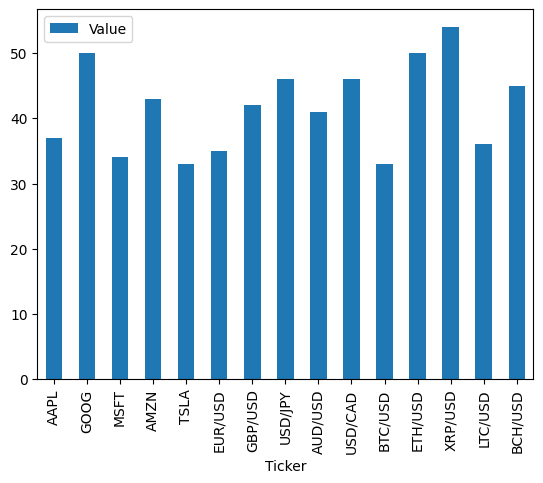

In [201]:
#algo_df.fillna(method="ffill",inplace=True)

algo_df["Daily Chnage"] = algo_df['Close'].pct_change()
algo_df['High Change'] = algo_df['Daily Chnage'] > 0.05
algo_df
tickers = algo_df['Ticker'].unique()
occurence = {}

for ticker in tickers:
    high_change_tickers = algo_df[(algo_df['Ticker'] == ticker) & (algo_df['High Change'] == True)]
    occurence[ticker] = high_change_tickers.shape[0]
occurence

df = pd.DataFrame(list(occurence.items()),columns=["Ticker","Value"])
df.set_index('Ticker',inplace=True)
df.plot(kind='bar')

### 3. Calculate the number of times each stock's price increased in the first quarter.

<Axes: xlabel='Ticker'>

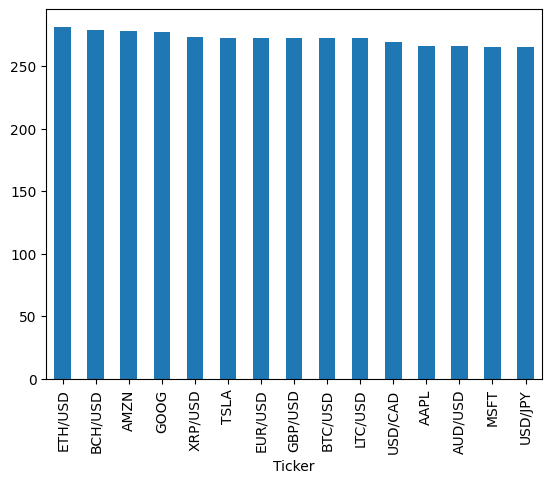

In [232]:
# algo_df['Date']
# algo_df['Date'] = pd.to_datetime(algo_df['Date'])
# algo_df['Date']
first_quarter = algo_df[algo_df['Date'].dt.month.isin([1,2,3])]
first_quarter = first_quarter[first_quarter['Close'] >first_quarter['Open']]
increased_counts = first_quarter['Ticker'].value_counts()
increased_counts.plot(kind='bar')




### 4. Calculate the percentage of times the opening price being higher than the previous day's closing price resulted in a higher closing price on that day.

### 5. Identify all assets with a daily percentage change higher than 8% and a volume greater than 100,000.

### 6. Identify all stocks in the Technology sector with a daily percentage change higher than 7.5%.

### 7. Write a function that can return the performance track record of two assets against each other over time.

### 8. Identify and remove duplicate rows from both datasets. How many duplicates were removed?

### 9. For the fundamental dataset, identify rows where the Market Cap is NaN, and impute these values using a sector-wise median Market Cap.

### 10. Filter the combined dataset to find the top 5 most volatile stocks based on the standard deviation of daily percentage changes.